# WINE QUALITY PREDICTION

## Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
sns.set()

## Load the data

In [2]:
data= pd.read_csv('WineQT.csv')

In [3]:
data.shape

(1143, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Dealing with missing values

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Hence, no missing values in our given dataset.

## Data Analysis and visualisation

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


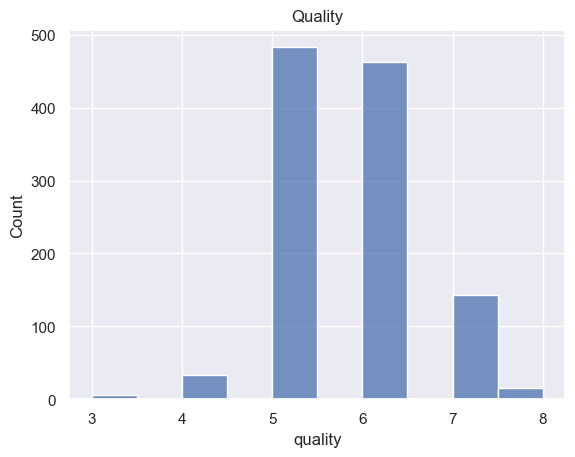

In [8]:
sns.histplot(data['quality'], bins=10)
plt.title('Quality')
plt.show()

<Axes: xlabel='quality', ylabel='fixed acidity'>

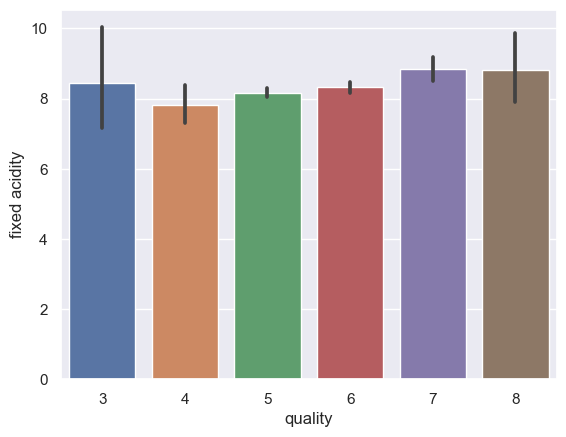

In [9]:
sns.barplot(x='quality', y='fixed acidity', data=data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

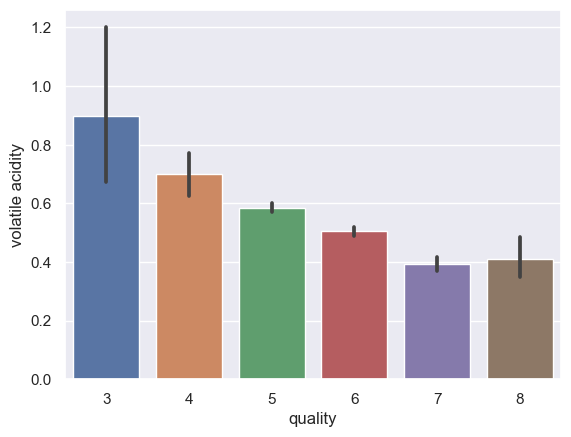

In [10]:
sns.barplot(x='quality', y='volatile acidity', data=data)

<Axes: xlabel='quality', ylabel='alcohol'>

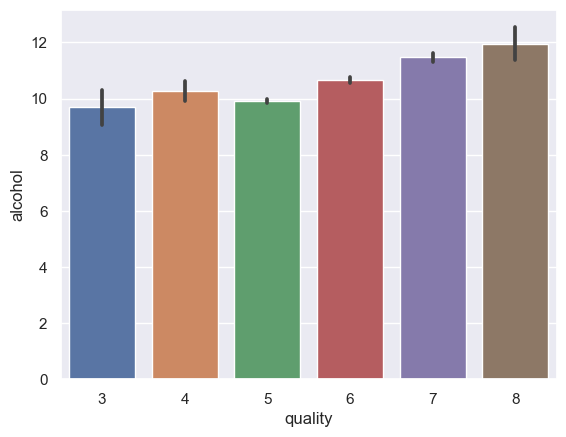

In [11]:
sns.barplot(x='quality', y='alcohol', data=data)

In [12]:
corr_data= data.corr()

<Axes: >

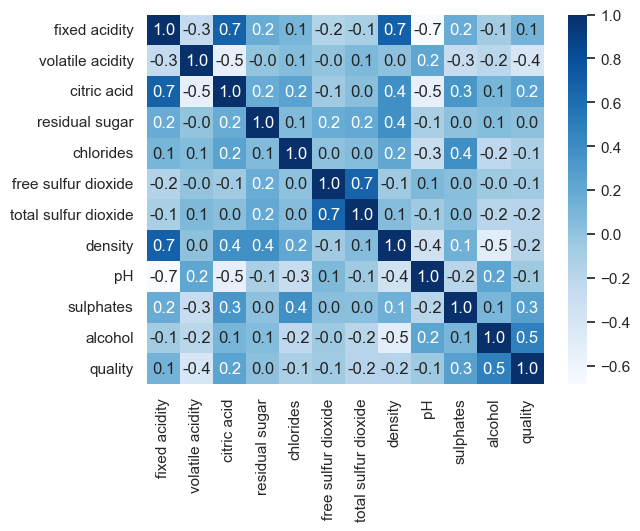

In [13]:
sns.heatmap(data=corr_data, annot=True, cmap='Blues', fmt='.1f')

## Data Preprocessing

In [14]:
x= data.iloc[ :, :-1]

In [15]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [16]:
y_original=data.iloc[:, -1]

In [17]:
y_original

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

### Label Encoding

In [18]:
y= data['quality'].apply(lambda y_original: 1 if y_original>=7 else 0)

In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

### Splitting into train and test sets

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=7)

In [21]:
x_train.shape

(914, 11)

In [22]:
x_test.shape

(229, 11)

In [23]:
y_train.shape

(914,)

In [24]:
y_test.shape

(229,)

## Training the model

### Multiple Linear regression

In [25]:
mLReg= LinearRegression()

In [26]:
mLReg.fit(x_train,y_train)

LinearRegression()

In [27]:
mLReg.coef_

array([ 2.99448509e-02, -2.45732377e-01,  9.31918521e-02,  3.57773221e-02,
       -7.30961374e-01, -1.85061321e-03, -5.32161115e-04, -3.79018227e+01,
       -1.39545400e-02,  3.68257366e-01,  7.01002267e-02])

In [28]:
mLReg.intercept_

36.869833589533776

In [29]:
#Calculating the r-squared

In [30]:
mLReg.score(x_train,y_train)

0.25858894554372314

### Random Forest Classifier

In [31]:
rFCReg= RandomForestClassifier()

In [32]:
rFCReg.fit(x_train,y_train)

RandomForestClassifier()

### Support Vector Regression

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

In [34]:
kernel = 'rbf' 
C = 1.0  
epsilon = 0.1 
svrModel = SVR(kernel=kernel, C=C, epsilon=epsilon)


In [35]:
svrModel.fit(X_train_scaled, y_train)

SVR()

## Model Evaluation

### Accuracy score

In [36]:
# Multiple Linear Regression Model

In [37]:
x_test_pred=mLReg.predict(x_test)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, x_test_pred)

# Print the MSE
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09169188039436213


In [38]:
# Random Forest Classifier Model

In [39]:
x_test_pred=rFCReg.predict(x_test)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, x_test_pred)

# Print the MSE
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08296943231441048


In [40]:
# Support Vector Regression Model

In [41]:
X_test_scaled = scaler.transform(x_test)
x_test_pred=svrModel.predict(X_test_scaled)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, x_test_pred)

# Print the MSE
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08808027906108466


##### Since Random Forest Classifier has least mean squared error, it is the most efficient model for the prediction of wine quality

## Checking Prediction Results

In [42]:
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
611,8.2,0.260,0.34,2.5,0.073,16.0,47.0,0.99594,3.40,0.78,11.3,7
26,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6
124,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
484,8.1,0.780,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,5
557,6.9,0.635,0.17,2.4,0.241,6.0,18.0,0.99610,3.40,0.59,10.3,6
20,7.1,0.710,0.00,1.9,0.080,14.0,35.0,0.99720,3.47,0.55,9.4,5
626,6.8,0.570,0.00,2.5,0.072,32.0,64.0,0.99491,3.43,0.56,11.2,6
986,6.0,0.490,0.00,2.3,0.068,15.0,33.0,0.99292,3.58,0.59,12.5,6
597,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
290,10.6,0.480,0.64,2.2,0.111,6.0,20.0,0.99700,3.26,0.66,11.7,6


In [43]:
# Positive Result

input_data=(12.8, 0.3, 0.74, 2.6, 0.0095,9.0,28.0,0.9994,3.2,0.77,10.8)

#changing the input data to a numpy array

input_data_as_np=np.asarray(input_data)

#reshape the data 

input_data_reshaped=input_data_as_np.reshape(1,-1)

prediction=rFCReg.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine


C:\Users\jayab\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
# Negative Result

input_data=(7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5)

#changing the input data to a numpy array

input_data_as_np=np.asarray(input_data)

#reshape the data 

input_data_reshaped=input_data_as_np.reshape(1,-1)

prediction=rFCReg.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


C:\Users\jayab\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Building a predictor system

In [45]:
print("Enter the values to check the quality of wine: ")

fixed_acidity= float(input("Enter the value of fixed acidity: "))
volatile_acidity= float(input("Enter the value of volatile acidity: "))
citric_acid= float(input("Enter the value of citric acid: "))
residual_sugar= float(input("Enter the value of residual sugar: "))
chlorides= float(input("Enter the value of chlorides: "))
free_sulfur_dioxide= float(input("Enter the value of free sulphur dioxide: "))
total_sulfur_dioxide= float(input("Enter the value of total sulphur dioxide: "))
density= float(input("Enter the value of density: "))
pH= float(input("Enter the value of pH: "))
sulphates= float(input("Enter the value of sulphates: "))
alcohol= float(input("Enter the value of alchohol: "))

input_=(fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol)


input_as_np=np.asarray(input_)


input_reshaped=input_as_np.reshape(1,-1)

prediction=rFCReg.predict(input_reshaped)

print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Enter the values to check the quality of wine: 
Enter the value of fixed acidity: 7.0
Enter the value of volatile acidity: 0.35
Enter the value of citric acid: 0.33
Enter the value of residual sugar: 2.0
Enter the value of chlorides: 0.065
Enter the value of free sulphur dioxide: 4.0
Enter the value of total sulphur dioxide: 7.0
Enter the value of density: 0.99257
Enter the value of pH: 3.45
Enter the value of sulphates: 0.54
Enter the value of alchohol: 12.5
[1]
Good Quality Wine


C:\Users\jayab\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# THANK YOU